In [1]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image


In [2]:
df = pd.DataFrame(pd.read_csv('train.csv'))
df.fillna(0, inplace=True)
df.head(7)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [18]:
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = df['Survived']
X['Sex'] = X['Sex'].replace(['male', 'female'], [0,1])
X['Embarked'] = X['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3])

In [55]:
df.isnull().any().any()
df.isnull().sum().sum()
891*8
df.columns[df.isna().any()].tolist()
pd.set_option('display.max_rows', None)
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,0,35.0,0,0,8.0500,3
5,3,0,0.0,0,0,8.4583,2
6,1,0,54.0,0,0,51.8625,3
7,3,0,2.0,3,1,21.0750,3
8,3,1,27.0,0,2,11.1333,3
9,2,1,14.0,1,0,30.0708,1


In [19]:
condition = df['Age'].isna() & (df['Parch'] > 0)
condition.sum()

condition = X.Age.isna() & (X.Parch == 0)
print(condition.sum())


0


In [20]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [56]:
# Import test.csv and store passenger ids before dropping them
X_test_df = pd.DataFrame(pd.read_csv('test.csv'))
Xtest_passengerids = X_test_df.PassengerId
X_test = X_test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)


In [ ]:
X_test['Sex'] = X_test['Sex'].replace(['male', 'female'], [0,1])
X_test['Embarked'] = X_test['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3])
X_test.head(30)

In [ ]:
X_test.isnull().any().any()
X_test.isnull().sum().sum()
X_test.columns[X_test.isna().any()].tolist()
X_test.fillna(0, inplace=True)
X_test

In [59]:
y_predictions = rf.predict(X_test)
y_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

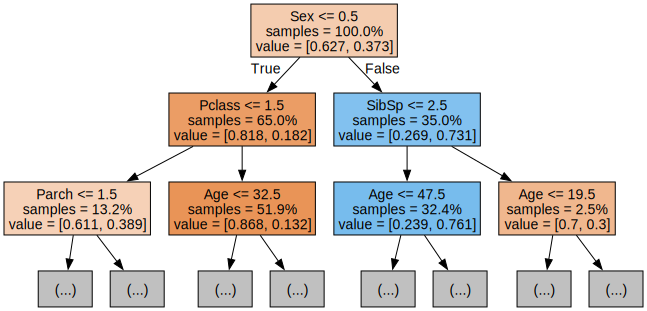

In [63]:
import graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X_test.columns, filled=True, max_depth=2, impurity=False, proportion=True)

graph = graphviz.Source(dot_data)
display(graph)


In [64]:
parameter_distribution = {'n_estimators': randint(50,500), 'max_depth': randint(1, 20)}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(rf, param_distributions = parameter_distribution, n_iter = 5, cv = 5)
random_search.fit(X, y)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28cbe3ad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x298f64bd0>})

In [66]:
best_rf = random_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=9, n_estimators=281)

In [70]:
best_y_predictions = best_rf.predict(X_test)
len(best_y_predictions)

418

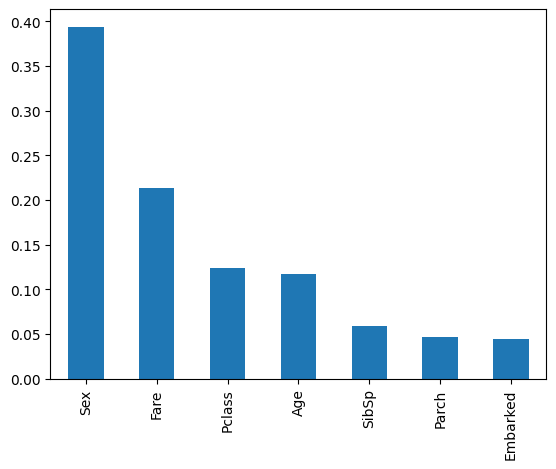

In [14]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [75]:
import csv
output = pd.DataFrame({'PassengerId': Xtest_passengerids, 'Survived': best_y_predictions}).reset_index(drop=True)
output.to_csv('titanic_kagggle_submission.csv', index=False)
output
len(output)

418